In [67]:
import pandas as pd
a=pd.read_csv('/content/drive/MyDrive/hypothyroid_ML_project_ds.csv')
print(a)

      age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0      41   F            f                  f                         f    f   
1      23   F            f                  f                         f    f   
2      46   M            f                  f                         f    f   
3      70   F            t                  f                         f    f   
4      70   F            f                  f                         f    f   
...   ...  ..          ...                ...                       ...  ...   
3767   30   F            f                  f                         f    f   
3768   68   F            f                  f                         f    f   
3769   74   F            f                  f                         f    f   
3770   72   M            f                  f                         f    f   
3771   64   F            f                  f                         f    f   

     pregnant thyroid_surgery I131_trea

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
features=a.drop("binaryClass", axis=1)
print(features.columns)

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source'],
      dtype='object')


In [70]:
a=a.drop('referral_source',axis=1)
a=a.drop('TBG_measured',axis=1)
a=a.drop('TBG',axis=1)
print(a)

      age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0      41   F            f                  f                         f    f   
1      23   F            f                  f                         f    f   
2      46   M            f                  f                         f    f   
3      70   F            t                  f                         f    f   
4      70   F            f                  f                         f    f   
...   ...  ..          ...                ...                       ...  ...   
3767   30   F            f                  f                         f    f   
3768   68   F            f                  f                         f    f   
3769   74   F            f                  f                         f    f   
3770   72   M            f                  f                         f    f   
3771   64   F            f                  f                         f    f   

     pregnant thyroid_surgery I131_trea

In [71]:
import numpy as np
a=a.replace(['?'],np.nan)
a.isnull().sum()
print(a)

      age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0      41   F            f                  f                         f    f   
1      23   F            f                  f                         f    f   
2      46   M            f                  f                         f    f   
3      70   F            t                  f                         f    f   
4      70   F            f                  f                         f    f   
...   ...  ..          ...                ...                       ...  ...   
3767   30   F            f                  f                         f    f   
3768   68   F            f                  f                         f    f   
3769   74   F            f                  f                         f    f   
3770   72   M            f                  f                         f    f   
3771   64   F            f                  f                         f    f   

     pregnant thyroid_surgery I131_trea

In [72]:
columns_to_replace= ['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured']
a[columns_to_replace] = a[columns_to_replace].replace({'t': 1, 'f': 0})
print(a)


      age sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0      41   F             0                   0                          0   
1      23   F             0                   0                          0   
2      46   M             0                   0                          0   
3      70   F             1                   0                          0   
4      70   F             0                   0                          0   
...   ...  ..           ...                 ...                        ...   
3767   30   F             0                   0                          0   
3768   68   F             0                   0                          0   
3769   74   F             0                   0                          0   
3770   72   M             0                   0                          0   
3771   64   F             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatment  query_hy

In [73]:
a.sex.replace({'F':2,'M':1},inplace=True)
round_Values=round(a.sex.mean())
a.sex=a.sex.fillna(round_Values)
a.sex.unique()
np.array([2.,1.])
a.isnull().sum()
print(a)

      age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0      41  2.0             0                   0                          0   
1      23  2.0             0                   0                          0   
2      46  1.0             0                   0                          0   
3      70  2.0             1                   0                          0   
4      70  2.0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
3767   30  2.0             0                   0                          0   
3768   68  2.0             0                   0                          0   
3769   74  2.0             0                   0                          0   
3770   72  1.0             0                   0                          0   
3771   64  2.0             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatme

In [74]:
a.binaryClass.replace({'P':1,'N':0},inplace=True)
target=a['binaryClass']
round_Values=round(target.mean())
target=target.fillna(round_Values)
a.isnull().sum()


age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
T4U_measured                   0
T4U                          387
FTI_measured                   0
FTI                          385
binaryClass                    0
dtype: int64

In [75]:
a = a.fillna(a.mode().iloc[0])
print(a.isnull().sum())


age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
binaryClass                  0
dtype: int64


In [76]:
import matplotlib.pyplot as plt
features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
            'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
            'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
            'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
            'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
            'FTI_measured', 'FTI']
target='binaryClass'
fig,axes=plt.subplots(nrows=len(features),ncols=1,figsize=(35,6*len(features)))
for i, feature in enumerate(features):
    ax=axes[i]
    gd=a.groupby([feature,target]).size().unstack().fillna(0)
    gd.plot(kind='bar',stacked=True,ax=ax)
    ax.set_title(f'{feature} vs Binary Class')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title=target)
plt.tight_layout()
plt.show()


In [77]:
x=a.drop(columns=['binaryClass'])
y=a['binaryClass']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(x,y)

      age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0      41  2.0             0                   0                          0   
1      23  2.0             0                   0                          0   
2      46  1.0             0                   0                          0   
3      70  2.0             1                   0                          0   
4      70  2.0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
3767   30  2.0             0                   0                          0   
3768   68  2.0             0                   0                          0   
3769   74  2.0             0                   0                          0   
3770   72  1.0             0                   0                          0   
3771   64  2.0             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatme

In [78]:
#min max scaling
import pandas as pd
cols_scale=x.columns
scaled_x=x.copy()
for col in cols_scale:
    scaled_col=pd.to_numeric(x[col],errors='coerce')
    min_val=scaled_col.min()
    max_val=scaled_col.max()
    scaled_col=(scaled_col-min_val)/(max_val-min_val)
    scaled_x[col]=scaled_col
print(scaled_x)

           age  sex  on_thyroxine  query_on_thyroxine  \
0     0.088106  1.0           0.0                 0.0   
1     0.048458  1.0           0.0                 0.0   
2     0.099119  0.0           0.0                 0.0   
3     0.151982  1.0           1.0                 0.0   
4     0.151982  1.0           0.0                 0.0   
...        ...  ...           ...                 ...   
3767  0.063877  1.0           0.0                 0.0   
3768  0.147577  1.0           0.0                 0.0   
3769  0.160793  1.0           0.0                 0.0   
3770  0.156388  0.0           0.0                 0.0   
3771  0.138767  1.0           0.0                 0.0   

      on_antithyroid_medication  sick  pregnant  thyroid_surgery  \
0                           0.0   0.0       0.0              0.0   
1                           0.0   0.0       0.0              0.0   
2                           0.0   0.0       0.0              0.0   
3                           0.0   0.0      

In [79]:
print(x)

      age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0      41  2.0             0                   0                          0   
1      23  2.0             0                   0                          0   
2      46  1.0             0                   0                          0   
3      70  2.0             1                   0                          0   
4      70  2.0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
3767   30  2.0             0                   0                          0   
3768   68  2.0             0                   0                          0   
3769   74  2.0             0                   0                          0   
3770   72  1.0             0                   0                          0   
3771   64  2.0             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatme

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scale_x_f=x.copy()
scale_x_f=scaler.fit_transform(scale_x_f)
print(scale_x_f)

[[0.08810573 1.         0.         ... 0.42995169 1.         0.27226463]
 [0.04845815 1.         0.         ... 0.35748792 0.         0.24936387]
 [0.09911894 0.         0.         ... 0.31884058 1.         0.30025445]
 ...
 [0.16079295 1.         0.         ... 0.39613527 1.         0.26208651]
 [0.15638767 0.         0.         ... 0.33333333 1.         0.21628499]
 [0.13876652 1.         0.         ... 0.39613527 1.         0.22900763]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

ACCURACY:  0.9624338624338624


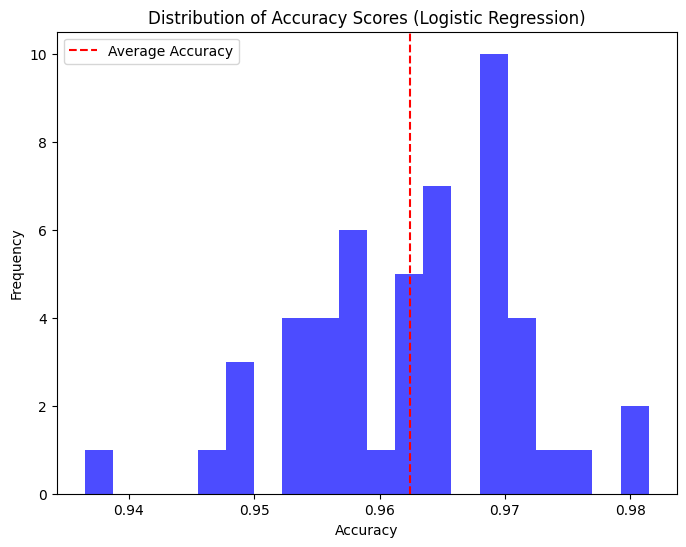

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

accuracies = []


num_iterations = 50


for i in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
    lr = LogisticRegression(max_iter=1000)
    lrclf = lr.fit(X_train, y_train)
    y_pred = lrclf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

logistic_accuracy = np.mean(accuracies)
print("ACCURACY: ",logistic_accuracy)
plt.figure(figsize=(8, 6))
plt.hist(accuracies, bins=20, color='blue', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores (Logistic Regression)')

average_accuracy = np.mean(accuracies)
plt.axvline(x=average_accuracy, color='red', linestyle='--', label='Average Accuracy')
plt.legend()

plt.show()


ACCURACY:  0.9401587301587301


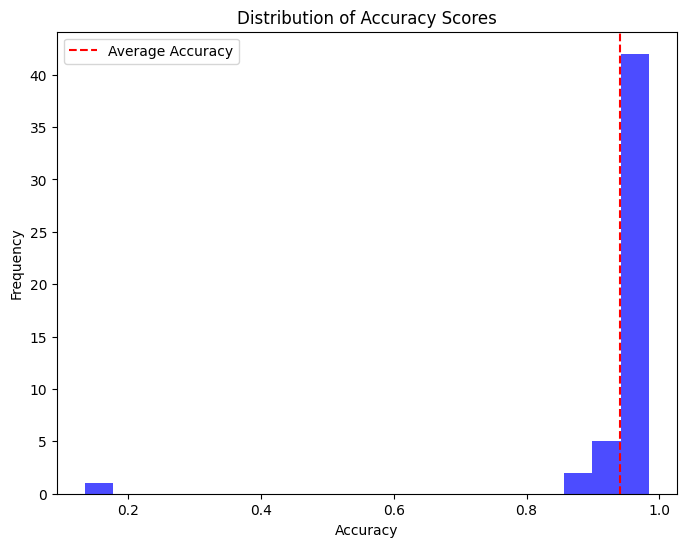

In [82]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt

accuracies = []

num_iterations = 50


for i in range(num_iterations):
    X_boot, y_boot = resample(x, y, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_boot, y_boot, test_size=0.1)

    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

perceptron_accuracy = np.mean(accuracies)
print("ACCURACY: ",perceptron_accuracy)

plt.figure(figsize=(8, 6))
plt.hist(accuracies, bins=20, color='blue', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores')

average_accuracy_perceptron = np.mean(accuracies)
plt.axvline(x=average_accuracy_perceptron, color='red', linestyle='--', label='Average Accuracy')
plt.legend()

plt.show()


ACCURACY:  0.97989417989418
[[ 23   6]
 [  1 348]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        29
           1       0.98      1.00      0.99       349

    accuracy                           0.98       378
   macro avg       0.97      0.90      0.93       378
weighted avg       0.98      0.98      0.98       378



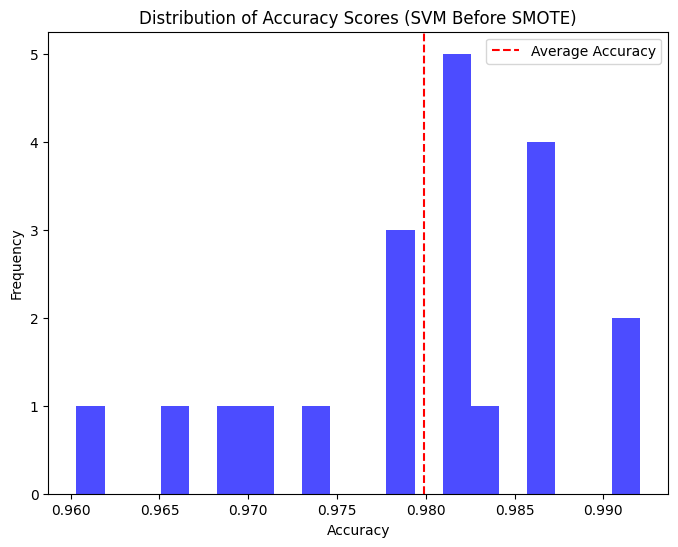

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt


accuracies = []

num_iterations = 20

for i in range(num_iterations):
    X_boot, y_boot = resample(x, y, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_boot, y_boot, test_size=0.1)

    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
SVM_accuracy_before_SMOTE = np.mean(accuracies)
print("ACCURACY: ",SVM_accuracy_before_SMOTE)

report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(report)

plt.figure(figsize=(8, 6))
plt.hist(accuracies, bins=20, color='blue', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores (SVM Before SMOTE)')

average_accuracy_SVM_before_SMOTE = np.mean(accuracies)
plt.axvline(x=average_accuracy_SVM_before_SMOTE, color='red', linestyle='--', label='Average Accuracy')
plt.legend()

plt.show()


ACCURACY:  0.8575418994413405
[[160  21]
 [ 30 147]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       181
           1       0.88      0.83      0.85       177

    accuracy                           0.86       358
   macro avg       0.86      0.86      0.86       358
weighted avg       0.86      0.86      0.86       358



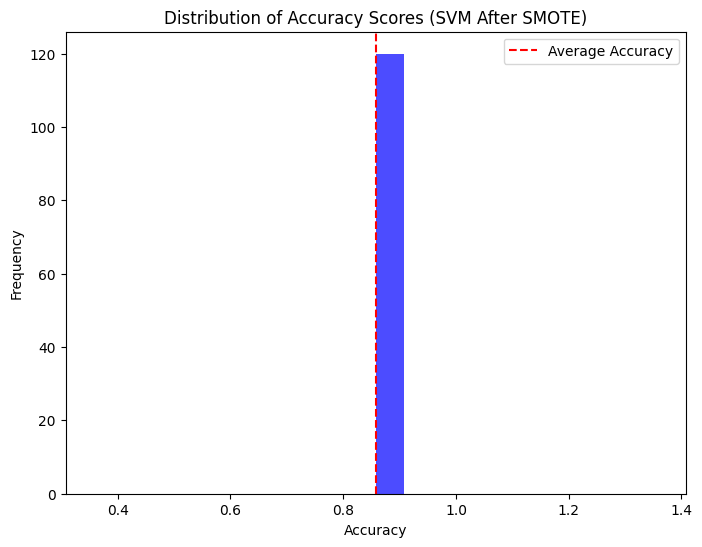

In [84]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import numpy as np
X, y = make_classification(n_classes=2, weights=[0.1, 0.9], n_samples=1000, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

accuracies = []

num_iterations = 120

for i in range(num_iterations):
    X_boot, y_boot = resample(X_resampled, y_resampled, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_boot, y_boot, test_size=0.2, random_state=42)

    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

SVM_accuracy_after_SMOTE = np.mean(accuracies)
print("ACCURACY: ",SVM_accuracy_after_SMOTE)

report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(report)
plt.figure(figsize=(8, 6))
plt.hist(accuracies, bins=20, color='blue', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores (SVM After SMOTE)')

average_accuracy_SVM_after_SMOTE = np.mean(accuracies)
plt.axvline(x=average_accuracy_SVM_after_SMOTE, color='red', linestyle='--', label='Average Accuracy')
plt.legend()

plt.show()


ACCURACY:  0.9004166666666668


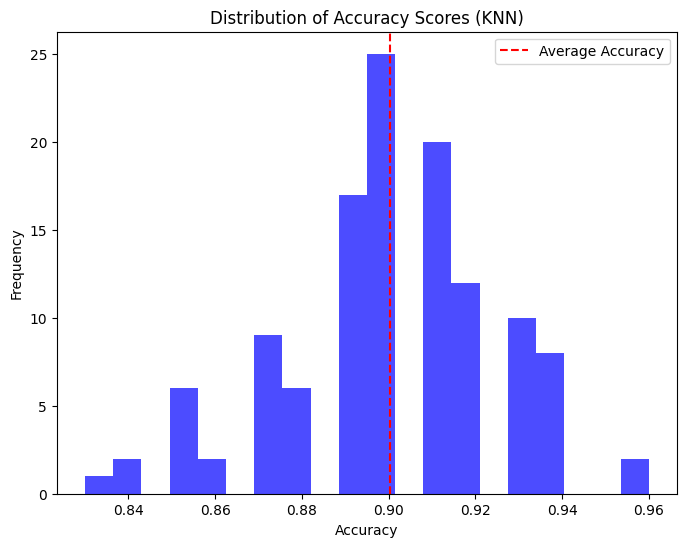

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt


accuracies = []

n_samples = 120
k_neighbors = 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

knn_models = []
for i in range(n_samples):
    X_boot, y_boot = resample(X_train, y_train, random_state=np.random.randint(1, 1000))
    knn = KNeighborsClassifier(n_neighbors=k_neighbors)
    knn.fit(X_boot, y_boot)
    y_pred = knn.predict(X_test)
    knn_models.append(knn)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

KNN_accuracy = np.mean(accuracies)
print("ACCURACY: ",KNN_accuracy)

plt.figure(figsize=(8, 6))
plt.hist(accuracies, bins=20, color='blue', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores (KNN)')

average_accuracy_KNN = np.mean(accuracies)
plt.axvline(x=average_accuracy_KNN, color='red', linestyle='--', label='Average Accuracy')
plt.legend()

plt.show()


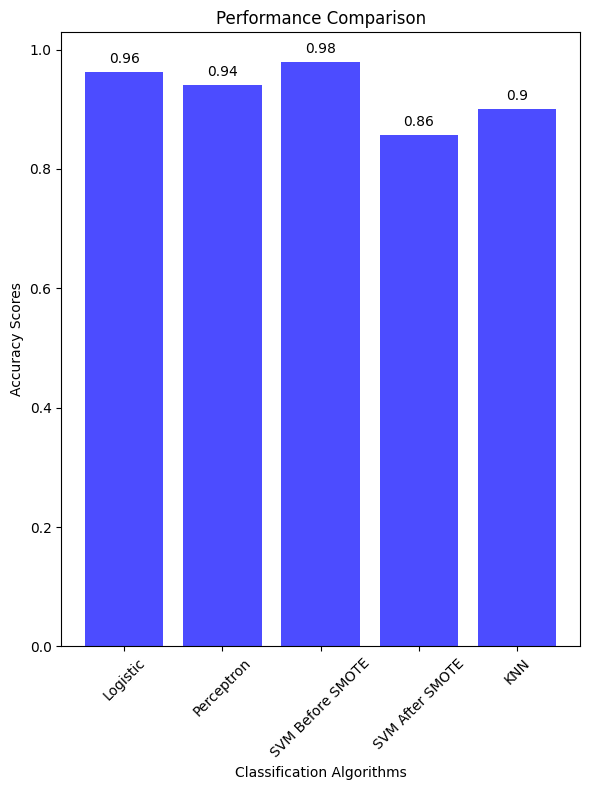

In [86]:
import matplotlib.pyplot as plt

algorithm_names = ['Logistic', 'Perceptron', 'SVM Before SMOTE', 'SVM After SMOTE', 'KNN']
accuracy_scores = [logistic_accuracy, perceptron_accuracy, SVM_accuracy_before_SMOTE, SVM_accuracy_after_SMOTE, KNN_accuracy]

plt.figure(figsize=(6, 8))

plt.bar(algorithm_names, accuracy_scores, color='blue', alpha=0.7)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Performance Comparison')

for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
